In [82]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




In [3]:
# load data set 
heart_data=pd.read_csv("heart.csv")

In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# to show last 5 rows
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# to show the size of data 
heart_data.shape

(303, 14)

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking missing data
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# show size of target column
heart_data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
heart_data["sex"].unique()

array([1, 0], dtype=int64)

In [12]:
heart_data["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

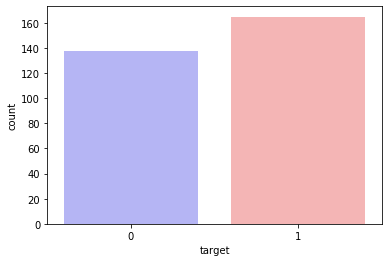

In [13]:
# show size of target
sns.countplot(x="target",data=heart_data,palette="bwr")
plt.show()

In [14]:
# show correlation 
corr=heart_data.corr()

In [15]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


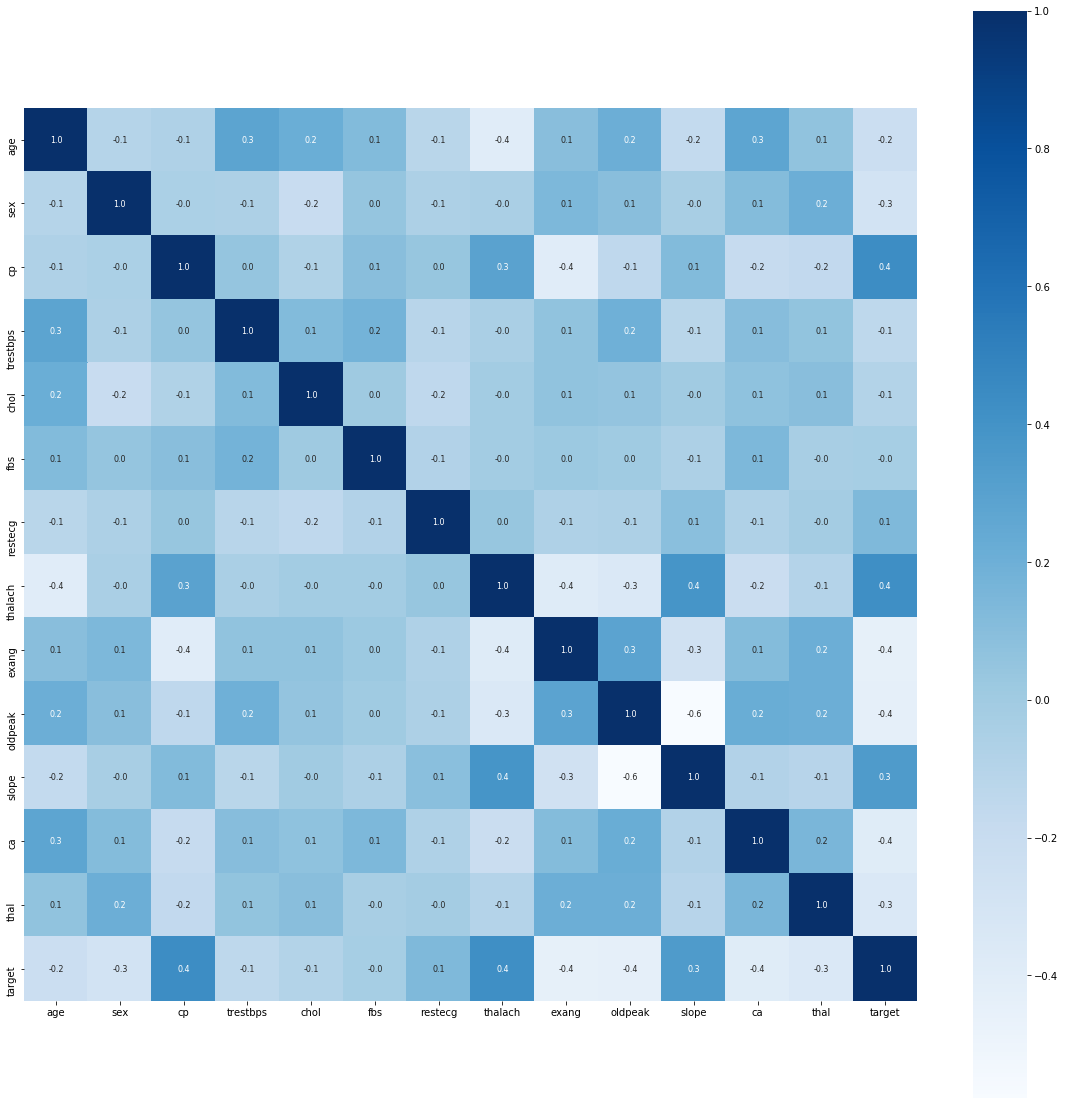

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Blues")
plt.show()


In [17]:
# percentage of target in data
countnodisease= len(heart_data[heart_data["target"]==0])
counthavedisease= len(heart_data[heart_data["target"]==1])
print("percentage of patients have not disease :{:.2f}%".format(countnodisease / (len(heart_data.target))*100))
print("percentage of patients have  disease :{:.2f}%".format(counthavedisease / (len(heart_data.target))*100))

percentage of patients have not disease :45.54%
percentage of patients have  disease :54.46%


In [18]:
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countnodisease / (len(heart_data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((counthavedisease / (len(heart_data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


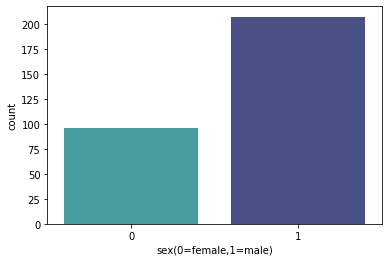

In [19]:
sns.countplot(x="sex",data=heart_data,palette="mako_r")
plt.xlabel("sex(0=female,1=male)")
plt.show()
# in this data count of male is higher than female

In [20]:
heart_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [21]:
mean_target=heart_data.groupby(['sex',"age"])["target"].mean().reset_index()

In [22]:
mean_target.head()

,sex,age,target
0,0,34,1.0
1,0,35,1.0
2,0,37,1.0
3,0,39,1.0
4,0,41,1.0


In [23]:
heart_data.groupby(['sex'])["target"].mean()

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

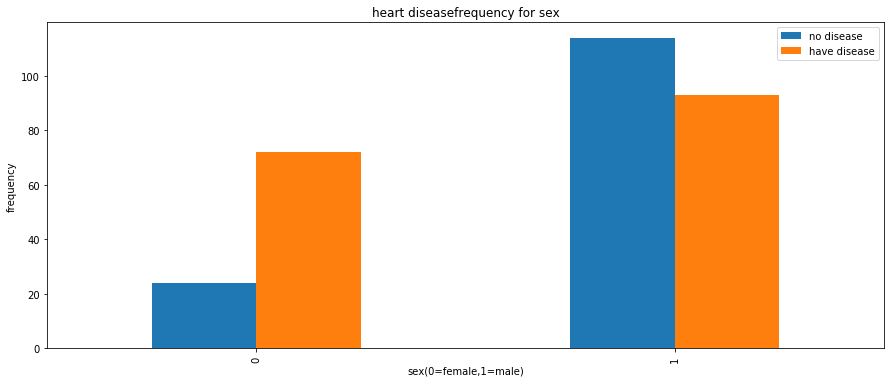

In [24]:
pd.crosstab(heart_data.sex,heart_data.target).plot(kind="bar",figsize=(15,6))
plt.title("heart diseasefrequency for sex")
plt.xlabel('sex(0=female,1=male)')
plt.legend(["no disease","have disease"])
plt.ylabel("frequency")
plt.show()

In [25]:
result=heart_data[(heart_data["sex"]==1)&(heart_data["target"]==1)]

In [26]:
result["target"].value_counts()

1    93
Name: target, dtype: int64

In [27]:
result1=heart_data[(heart_data["sex"]==0)&(heart_data["target"]==1)]

In [28]:
result1["target"].value_counts()

1    72
Name: target, dtype: int64

In [29]:
# result of this filter we found that no of male who has disease higher than female

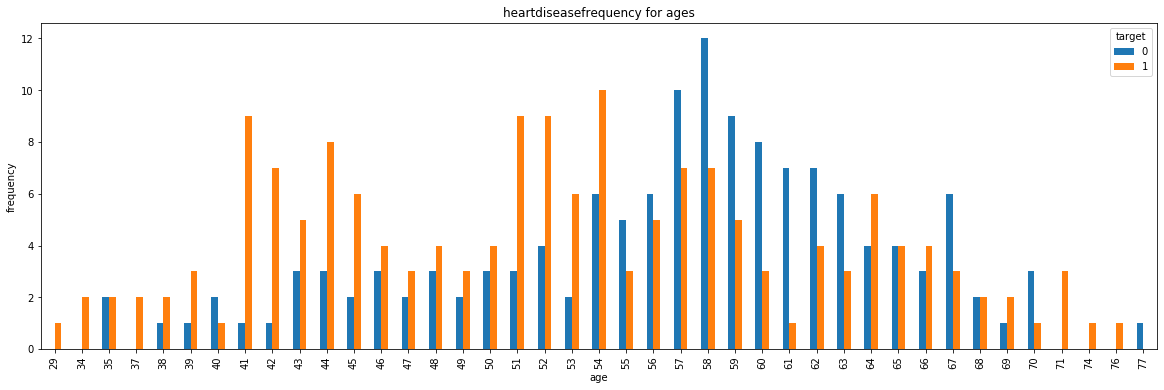

In [30]:
pd.crosstab(heart_data.age,heart_data.target).plot(kind='bar',figsize=(20,6))
plt.title("heartdiseasefrequency for ages")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

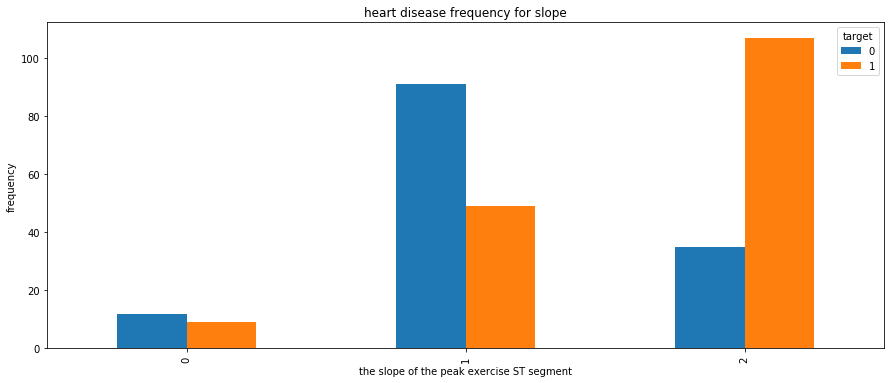

In [31]:
pd.crosstab(heart_data.slope,heart_data.target).plot(kind="bar",figsize=(15,6))
plt.title("heart disease frequency for slope")
plt.xlabel("the slope of the peak exercise ST segment")
plt.ylabel("frequency")
plt.show()

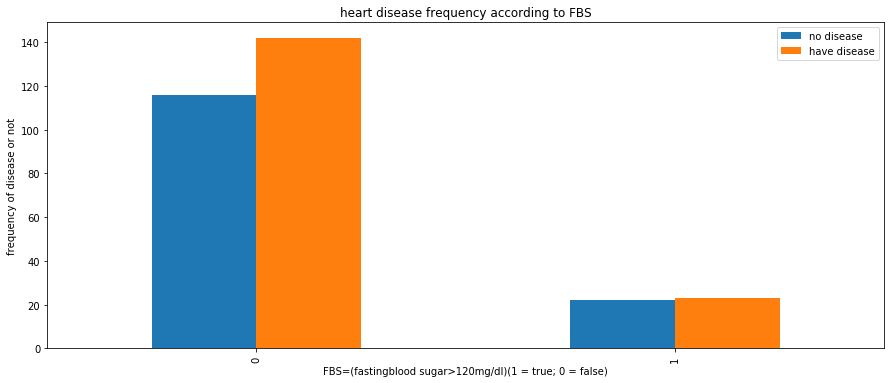

In [32]:
pd.crosstab(heart_data.fbs,heart_data.target).plot(kind="bar",figsize=(15,6))
plt.title("heart disease frequency according to FBS")
plt.xlabel("FBS=(fastingblood sugar>120mg/dl)(1 = true; 0 = false)")
plt.ylabel("frequency of disease or not")
plt.legend(["no disease","have disease"])
plt.show()

In [33]:
heart_data["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [34]:
result2=heart_data[(heart_data["fbs"]==0)&(heart_data["target"]==0)]

In [35]:
result2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
result2["target"].value_counts()

0    116
Name: target, dtype: int64

In [37]:
result3=heart_data[(heart_data["fbs"]==1)&(heart_data["target"]==0)]

In [38]:
result3["target"].value_counts()

0    22
Name: target, dtype: int64

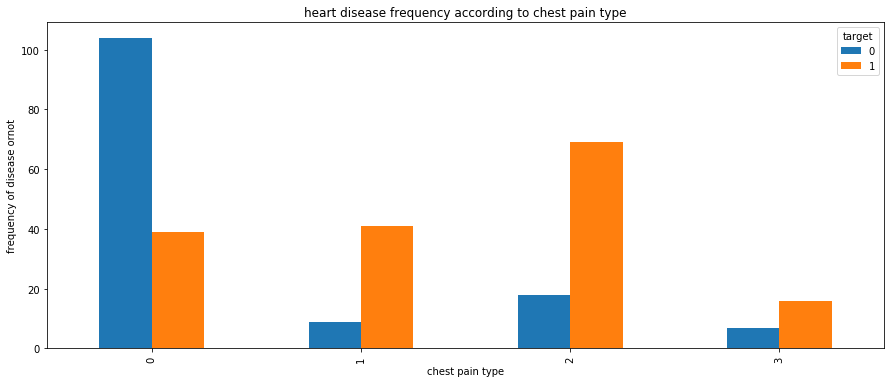

In [39]:
pd.crosstab(heart_data.cp,heart_data.target).plot(kind="bar",figsize=(15,6))
plt.title("heart disease frequency according to chest pain type")
plt.xlabel("chest pain type")
plt.ylabel('frequency of disease ornot')
plt.show()

In [40]:
# model training 

x=heart_data.drop("target",axis=1)
Y=heart_data["target"]


In [41]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [42]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [43]:
# standard scaler x
x_scl=StandardScaler()

In [44]:
X1=x_scl.fit_transform(x)

In [45]:
X1

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y,test_size=0.2)

In [47]:
lr=LogisticRegression()

In [48]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
train_preds=lr.predict(x_train)

In [50]:
test_preds=lr.predict(x_test)

In [51]:
# print accuracy 
print('train accuracy',accuracy_score(y_train,train_preds))

train accuracy 0.8512396694214877


In [52]:
print('test accuracy',accuracy_score(y_test,test_preds))

test accuracy 0.7868852459016393


In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

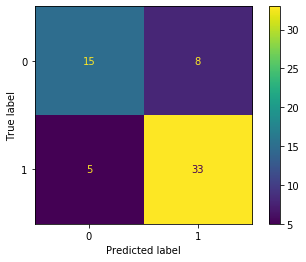

In [54]:
cm = confusion_matrix(y_test, test_preds, labels=lr.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lr.classes_)
disp.plot()
plt.show()


In [55]:
DR=DecisionTreeClassifier()

In [56]:
DR.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
train_preds=DR.predict(x_train)

In [58]:
test_preds=DR.predict(x_test)

In [59]:
print('train accuracy',accuracy_score(y_train,train_preds))

train accuracy 1.0


In [60]:
print('test accuracy',accuracy_score(y_test,test_preds))

test accuracy 0.7540983606557377


In [61]:
DR.get_depth()

9

In [62]:
DR1=DecisionTreeClassifier(max_depth=12)

In [63]:
DR1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
train_preds=DR1.predict(x_train)

In [65]:
test_preds=DR1.predict(x_test)

In [66]:
print('train accuracy',accuracy_score(y_train,train_preds))

train accuracy 1.0


In [67]:
print('test accuracy',accuracy_score(y_test,test_preds))

test accuracy 0.7213114754098361


In [68]:
KR= KNeighborsClassifier()

In [69]:
KR.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [70]:
train_preds=KR.predict(x_train)

In [71]:
test_preds=KR.predict(x_test)

In [72]:
print('train accuracy',accuracy_score(y_train,train_preds))

train accuracy 0.8801652892561983


In [73]:
print('test accuracy',accuracy_score(y_test,test_preds))

test accuracy 0.8032786885245902


In [74]:
for k in range(1,10,2):
    KR=KNeighborsClassifier(n_neighbors=k)
    KR.fit(x_train,y_train)
    train_preds=KR.predict(x_train)
    test_preds=KR.predict(x_test)
    print("n_neighbors",k)
    print("train acc",accuracy_score(y_train,train_preds))
    print("test acc",accuracy_score(y_test,test_preds))


n_neighbors 1
train acc 1.0
test acc 0.7540983606557377
n_neighbors 3
train acc 0.8966942148760331
test acc 0.7868852459016393
n_neighbors 5
train acc 0.8801652892561983
test acc 0.8032786885245902
n_neighbors 7
train acc 0.8884297520661157
test acc 0.8360655737704918
n_neighbors 9
train acc 0.8677685950413223
test acc 0.8032786885245902


In [75]:
KR1= KNeighborsClassifier(n_neighbors=7)

In [76]:
KR1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [77]:
train_preds=KR1.predict(x_train)

In [78]:
test_preds=KR1.predict(x_test)

In [79]:
print('train accuracy',accuracy_score(y_train,train_preds))

train accuracy 0.8884297520661157


In [80]:
print('test accuracy',accuracy_score(y_test,test_preds))

test accuracy 0.8360655737704918


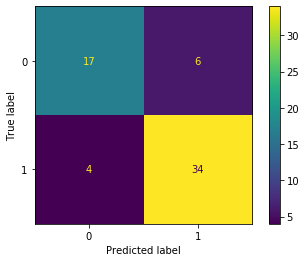

In [81]:
cm = confusion_matrix(y_test, test_preds, labels=KR1.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=KR1.classes_)
disp.plot()
plt.show()


In [83]:
rf=RandomForestClassifier()

In [84]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
train_preds=rf.predict(x_train)

In [86]:
test_preds=rf.predict(x_test)

In [87]:
print('train accuracy',accuracy_score(y_train,train_preds))

train accuracy 1.0


In [88]:
print('test accuracy',accuracy_score(y_test,test_preds))

test accuracy 0.819672131147541


In [89]:
for n in [1,5,10,20,50,100,150]:
    rf=RandomForestClassifier(n_estimators=n)
    rf.fit(x_train,y_train)
    train_preds=rf.predict(x_train)
    test_preds=rf.predict(x_test)
    print("n_estimators",n)
    print("train acc",accuracy_score(y_train,train_preds))
    print("test acc",accuracy_score(y_test,test_preds))


n_estimators 1
train acc 0.8966942148760331
test acc 0.7704918032786885
n_estimators 5
train acc 0.9834710743801653
test acc 0.7868852459016393
n_estimators 10
train acc 0.9958677685950413
test acc 0.7868852459016393
n_estimators 20
train acc 1.0
test acc 0.819672131147541
n_estimators 50
train acc 1.0
test acc 0.7704918032786885
n_estimators 100
train acc 1.0
test acc 0.8032786885245902
n_estimators 150
train acc 1.0
test acc 0.819672131147541


In [91]:
# after trying different models (KNN(n_neighbors=7)) and LogisticRegression are suitable models for this data to achieve good result

In [92]:
# use this model to pedict
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)

In [93]:
input_data_array=np.asarray(input_data)

In [94]:
# reshape array to enter model
input_data_reshaped=input_data_array.reshape(1,-1)

In [95]:
KR1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [96]:
prediction =KR1.predict(input_data_reshaped)

In [97]:
prediction 


array([1], dtype=int64)

In [ ]:
# this mean predict of model the person has disease according input data enter to model